In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!ls ./drive/MyDrive/CS5242_project/personal_testing/data

CAM16_100cls_10mask  pRCC_nolabel  WBC_1  WBC_10  WBC_100  WBC_50


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Epoch 1/10: 100%|██████████| 24/24 [00:06<00:00,  3.63it/s]


Epoch [1/10], Loss: 0.4445


Epoch 2/10: 100%|██████████| 24/24 [00:06<00:00,  3.56it/s]


Epoch [2/10], Loss: 0.2555


Epoch 3/10: 100%|██████████| 24/24 [00:06<00:00,  3.78it/s]


Epoch [3/10], Loss: 0.2190


Epoch 4/10: 100%|██████████| 24/24 [00:06<00:00,  3.70it/s]


Epoch [4/10], Loss: 0.1566


Epoch 5/10: 100%|██████████| 24/24 [00:06<00:00,  3.69it/s]


Epoch [5/10], Loss: 0.1337


Epoch 6/10: 100%|██████████| 24/24 [00:06<00:00,  3.73it/s]


Epoch [6/10], Loss: 0.1759


Epoch 7/10: 100%|██████████| 24/24 [00:06<00:00,  3.60it/s]


Epoch [7/10], Loss: 0.1882


Epoch 8/10: 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]


Epoch [8/10], Loss: 0.1400


Epoch 9/10: 100%|██████████| 24/24 [00:06<00:00,  3.53it/s]


Epoch [9/10], Loss: 0.1694


Epoch 10/10: 100%|██████████| 24/24 [00:06<00:00,  3.84it/s]


Epoch [10/10], Loss: 0.1341


Epoch 1/10: 100%|██████████| 27/27 [00:08<00:00,  3.06it/s]


Epoch [1/10], Loss: 1.0520, Accuracy: 59.98%


Epoch 2/10: 100%|██████████| 27/27 [00:08<00:00,  3.10it/s]


Epoch [2/10], Loss: 0.4884, Accuracy: 83.37%


Epoch 3/10: 100%|██████████| 27/27 [00:08<00:00,  3.33it/s]


Epoch [3/10], Loss: 0.4252, Accuracy: 85.63%


Epoch 4/10: 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]


Epoch [4/10], Loss: 0.3512, Accuracy: 88.24%


Epoch 5/10: 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]


Epoch [5/10], Loss: 0.3885, Accuracy: 88.00%


Epoch 6/10: 100%|██████████| 27/27 [00:08<00:00,  3.15it/s]


Epoch [6/10], Loss: 0.4428, Accuracy: 82.90%


Epoch 7/10: 100%|██████████| 27/27 [00:08<00:00,  3.09it/s]


Epoch [7/10], Loss: 0.2691, Accuracy: 90.14%


Epoch 8/10: 100%|██████████| 27/27 [00:07<00:00,  3.38it/s]


Epoch [8/10], Loss: 0.1916, Accuracy: 92.40%


Epoch 9/10: 100%|██████████| 27/27 [00:08<00:00,  3.09it/s]


Epoch [9/10], Loss: 0.1639, Accuracy: 93.71%


Epoch 10/10: 100%|██████████| 27/27 [00:08<00:00,  3.18it/s]


Epoch [10/10], Loss: 0.1387, Accuracy: 95.13%
Training finished!


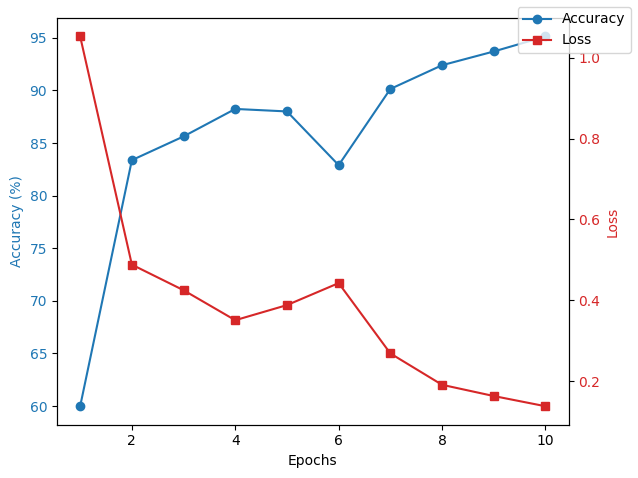

Evaluating: 100%|██████████| 54/54 [00:14<00:00,  3.69it/s]

Final Accuracy on the evaluation dataset: 93.06%


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import transforms, datasets, models
from torch.utils.data import DataLoader
from tqdm import tqdm

# Define transformations for the images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the WBC dataset corresponding to 4 different tasks
#data_dir = "./data/WBC_1/train/data"
#data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/WBC_1/train/data"
data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/WBC_10/train/data"
#data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/WBC_50/train/data"
#data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/WBC_100/train/data"
wbc_dataset = datasets.ImageFolder(root=data_dir, transform=transform)
wbc_loader = DataLoader(wbc_dataset, batch_size=32, shuffle=True)

# Set device (GPU if available, else CPU)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the ResNet-18 model without pretraining
model = models.resnet18(pretrained=True).to(device)
num_classes = len(wbc_dataset.classes)
model.fc = nn.Linear(model.fc.in_features, num_classes)

# Fetching Cam16 Dataset
cam16_data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/CAM16_100cls_10mask/train/data"
cam16_dataset = datasets.ImageFolder(root=cam16_data_dir, transform=transform)
cam16_loader = DataLoader(cam16_dataset, batch_size=32, shuffle=True)
model.fc = nn.Linear(model.fc.in_features, 2).to(device)

criterion = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# """
# Training loop for CAM16 dataset
num_epochs_cam16 = 10  # You can adjust the number of epochs as needed
for epoch in range(num_epochs_cam16):
    model.train()  # Set the model to training mode
    total_loss = 0.0

    for inputs, labels in tqdm(cam16_loader, desc=f'Epoch {epoch + 1}/{num_epochs_cam16}'):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    average_loss = total_loss / len(cam16_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs_cam16}], Loss: {average_loss:.4f}')

#torch.save(model.state_dict(), "./drive/MyDrive/CS5242_project/personal_testing/pretrained_cam16_model.pth")

model.fc = nn.Linear(model.fc.in_features, num_classes).to(device)
# """
# Set up criterion (loss function) and optimizer
#criterion = nn.CrossEntropyLoss().to(device)
#optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=1e-5)

# Training loop
num_epochs = 10  # As needed

# Single-cycle learning rate strategy
total_iterations = len(wbc_loader) * num_epochs
scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.01, total_steps=total_iterations)

epochs = range(1, 11)  # X-axis values (epochs)
accuracy_values = []  # Y-axis values for accuracy
loss_values = []  # Y-axis values for loss

for epoch in range(num_epochs):
    model.train()  # Set the model to training mode
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in tqdm(wbc_loader, desc=f'Epoch {epoch+1}/{num_epochs}'):
        inputs, labels = inputs.to(device), labels.to(device)

        # Forward pass
        outputs = model(inputs)

        # Calculate loss
        loss = criterion(outputs, labels)

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        scheduler.step()

        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct_predictions += (predicted == labels).sum().item()
        total_samples += labels.size(0)

    average_loss = total_loss / len(wbc_loader)
    accuracy = (correct_predictions / total_samples) * 100
    accuracy_values.append(accuracy)
    loss_values.append(average_loss)
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_loss:.4f}, Accuracy: {accuracy:.2f}%')

print("Training finished!")

import matplotlib.pyplot as plt

# Create a new figure with twin y-axes
fig, ax1 = plt.subplots()

# Plot accuracy on the first y-axis (ax1)
color = 'tab:blue'
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Accuracy (%)', color=color)
ax1.plot(epochs, accuracy_values, color=color, marker='o', label='Accuracy')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis sharing the same x-axis
ax2 = ax1.twinx()

# Plot loss on the second y-axis (ax2)
color = 'tab:red'
ax2.set_ylabel('Loss', color=color)
ax2.plot(epochs, loss_values, color=color, marker='s', label='Loss')
ax2.tick_params(axis='y', labelcolor=color)

# Display legend for both accuracy and loss plots
fig.tight_layout()
fig.legend(loc='upper right')

# Show the plot
plt.show()

# Define transformations for the evaluation dataset (without shuffling)
eval_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

# Load the WBC evaluation dataset
eval_data_dir = "./drive/MyDrive/CS5242_project/personal_testing/data/WBC_100/val/data"
#eval_data_dir = "./data/WBC_100/val/data"
eval_dataset = datasets.ImageFolder(root=eval_data_dir, transform=eval_transform)
eval_loader = DataLoader(eval_dataset, batch_size=32, shuffle=False, pin_memory=True)

# Save only the model weights corresponding to 4 tasks
#torch.save(model.state_dict(), './drive/MyDrive/CS5242_project/personal_testing/resnet18_WBC1_add.pth')
#torch.save(model.state_dict(), './drive/MyDrive/CS5242_project/personal_testing/resnet18_WBC10_add.pth')
#torch.save(model.state_dict(), './drive/MyDrive/CS5242_project/personal_testing/resnet18_WBC50_add.pth')
#torch.save(model.state_dict(), './drive/MyDrive/CS5242_project/personal_testing/resnet18_WBC100_add.pth')
# Calculate final accuracy on the evaluation dataset
model.eval()  # Set the model to evaluation mode
total_correct = 0
total_samples = 0


with torch.no_grad():
    for inputs, labels in tqdm(eval_loader, desc="Evaluating"):
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total_correct += (predicted == labels).sum().item()
        total_samples += labels.size(0)

final_accuracy = (total_correct / total_samples) * 100
print(f'Final Accuracy on the evaluation dataset: {final_accuracy:.2f}%')
